In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Load Data

In [2]:
df = pd.read_csv('data/titanic_data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### In R

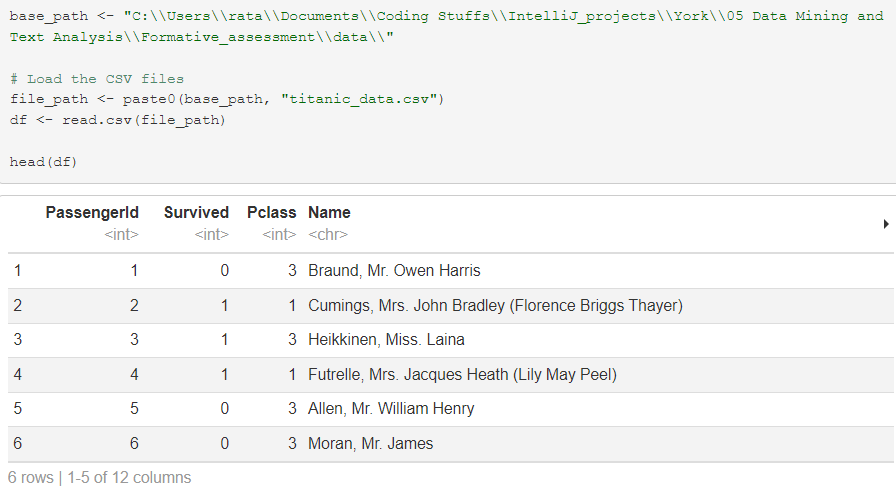

## Choose columns, remove records with missing data

In [3]:
X = df[['Pclass', 'Sex', 'Age', 'Survived']]
X.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

### In R

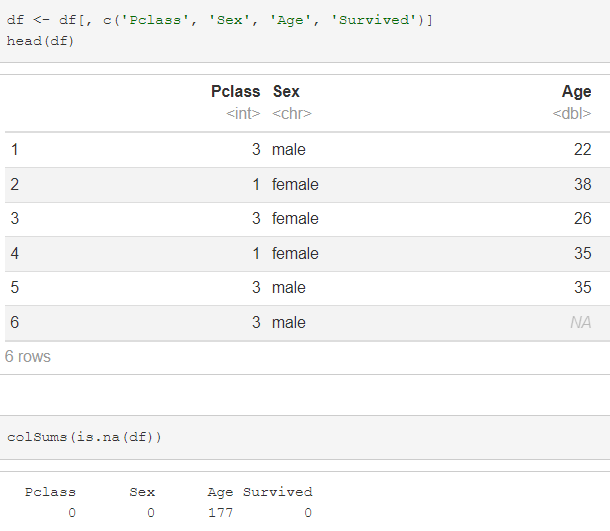

In [4]:
X = X.dropna()
y = X['Survived']
X = X.drop(columns='Survived')
print(len(X)==len(y))

True


### In R

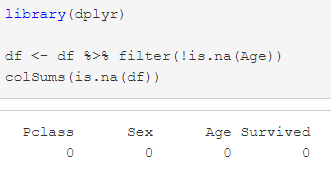

## Change data to categorical/factors

In [5]:
X['Sex'] = df['Sex'].astype('category').cat.codes 
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


### In R

equivalent of this is to label attributes as factors

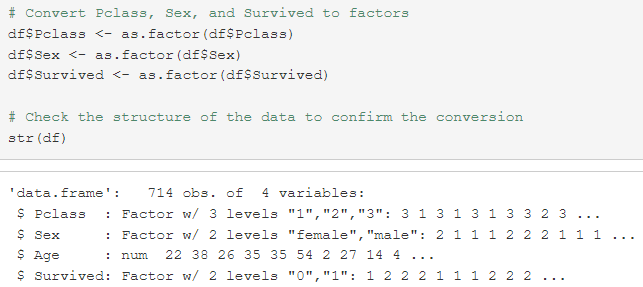

## Split the data

In [6]:
# Split the data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### In R

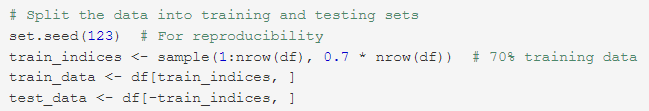

### Comparison with WEKA

WEKA automatically uses cross-validation without needing to split the data manually, but in this case using a percentage split which can be set manually.

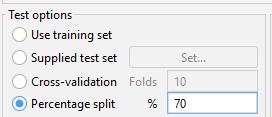

## Train and test models

In [7]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

In [8]:
# Train and test each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = accuracy

# Display accuracy results
results

{'Decision Tree': 0.7767441860465116,
 'Logistic Regression': 0.7627906976744186,
 'SVM': 0.6093023255813953}

### In R

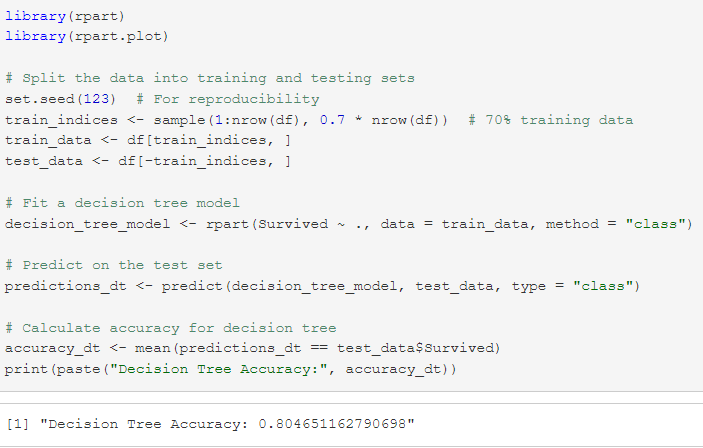
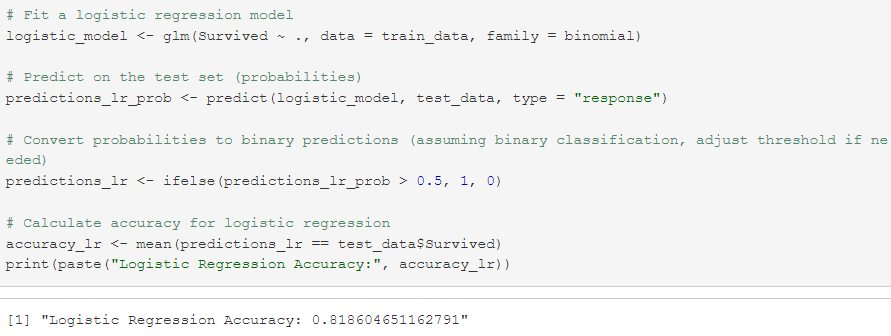
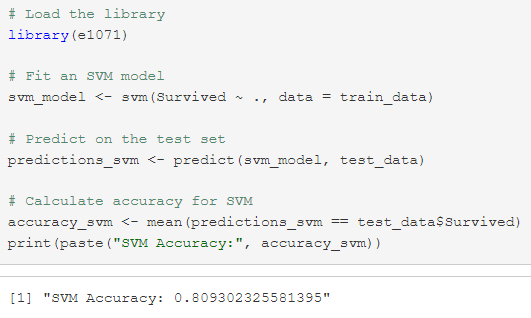

### Comparison with WEKA

Decision Tree is J48.

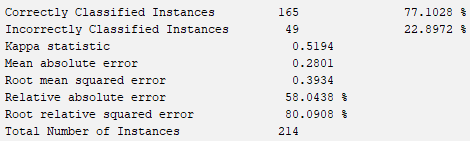

Logistic

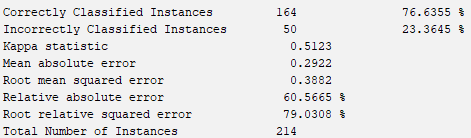

SVM is SMO

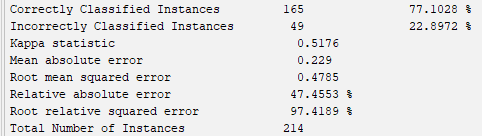

## Store results in a dataframe

In [31]:
# Convert results to a DataFrame
accuracy_df = pd.DataFrame(list(results.items()), columns=['Model', 'Python Accuracy'])
accuracy_df['WEKA Accuracy'] = [0.771028, 0.766355, 0.771028]
accuracy_df['R Accuracy'] = [0.804651, 0.818605, 0.809302]

accuracy_df

,Model,Python Accuracy,WEKA Accuracy,R Accuracy
0,Decision Tree,0.776744,0.771028,0.804651
1,Logistic Regression,0.762791,0.766355,0.818605
2,SVM,0.609302,0.771028,0.809302


## Final Results

In [32]:
overall_accuracy = accuracy_df['Python Accuracy'].mean()
overall_weka = accuracy_df['WEKA Accuracy'].mean()
overall_R = accuracy_df['R Accuracy'].mean()
accuracy_df.loc[len(accuracy_df)] = ['Overall Accuracy', overall_accuracy, overall_weka, overall_R]

def multiply_and_round(x):
    if isinstance(x, (int, float)):
        return round(x * 100, 2)
    return x

# Apply the function to the DataFrame
accuracy_df = accuracy_df.map(multiply_and_round)

# Add "(%)" to all column names except the first one
accuracy_df.columns = [accuracy_df.columns[0]] + [col + ' (%)' for col in accuracy_df.columns[1:]]

accuracy_df.to_csv('data/accuracy.csv', index=False)
accuracy_df

,Model,Python Accuracy (%),WEKA Accuracy (%),R Accuracy (%)
0,Decision Tree,77.67,77.10,80.47
1,Logistic Regression,76.28,76.64,81.86
2,SVM,60.93,77.10,80.93
3,Overall Accuracy,71.63,76.95,81.09


## Drawing the trees

### Python's Tree

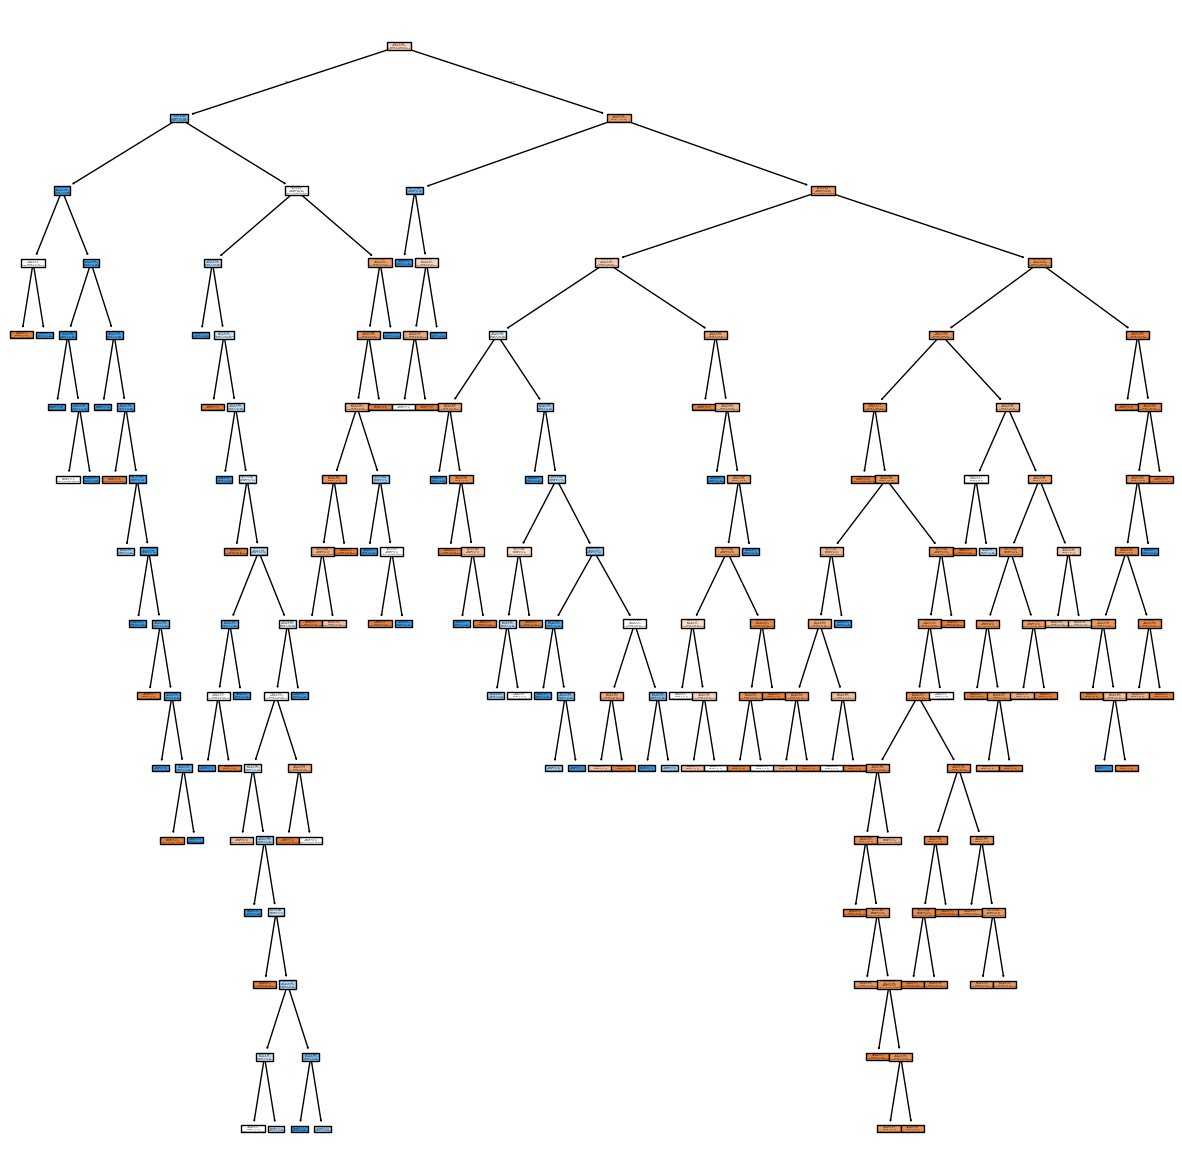

In [11]:
# Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15,15))  # Set the figure size for better readability
plot_tree(decision_tree, feature_names=['Pclass', 'Sex', 'Age'], class_names=['Did Not Survive', 'Survived'], filled=True)
plt.show()

### R's Tree
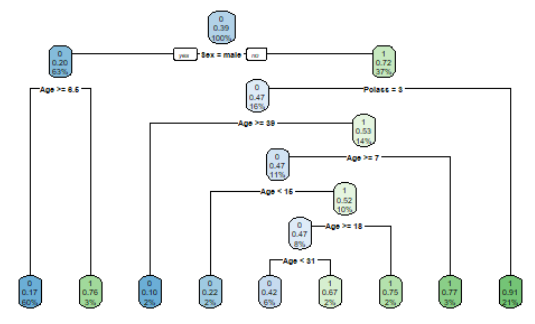

### WEKA's Tree

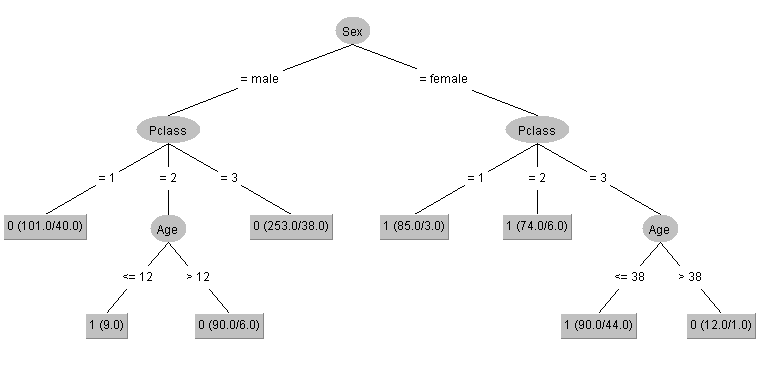